# Módulo 7 Sprint

## Tema

**Fundamentos del Deep Learning**

**Objetivo del proyecto (Competencias del módulo)**

*Elaborar un modelo predictivo aplicando redes neuronales y utilizando lenguaje Python para resolver un problema.*

**Descripción del ejercicio**

*Para este ejercicio se utilizará el dataset diabetes.csv. Usted debe:*

**1. Cargar los datos.**

**2. Realizar un resumen estadístico del dataset.**

**3. Dividir los datos en entrenamiento y test. Considere 75% y 25% respectivamente.**

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 8)
plt.style.use('ggplot')

diabetes = pd.read_csv('diabetes.csv')
diabetes.info()
diabetes.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


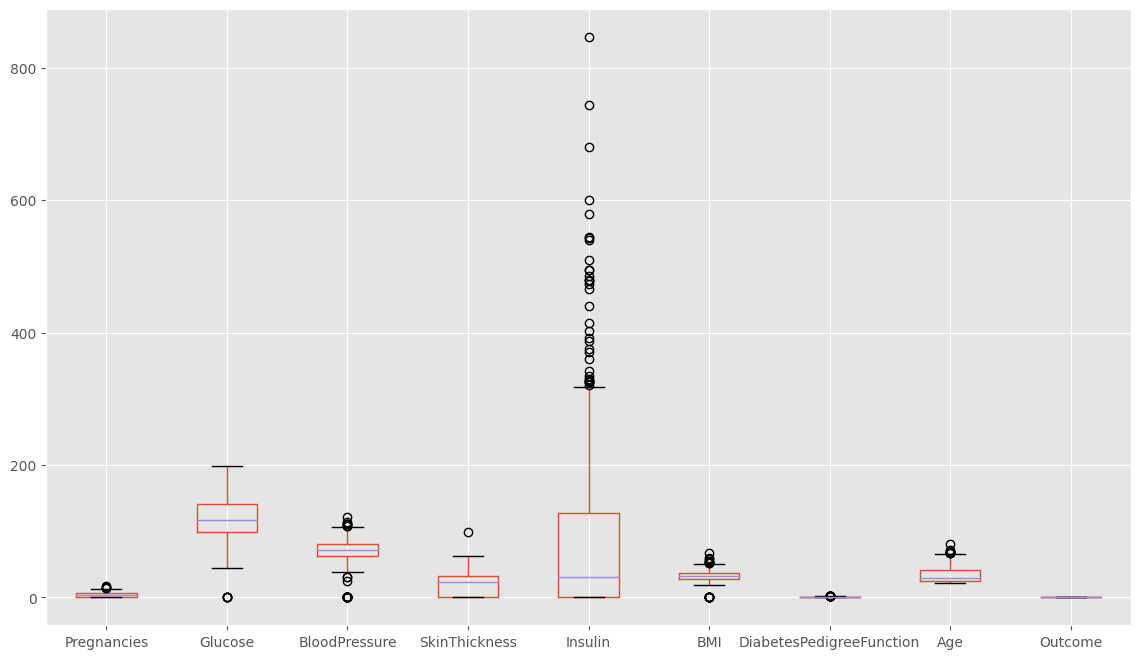

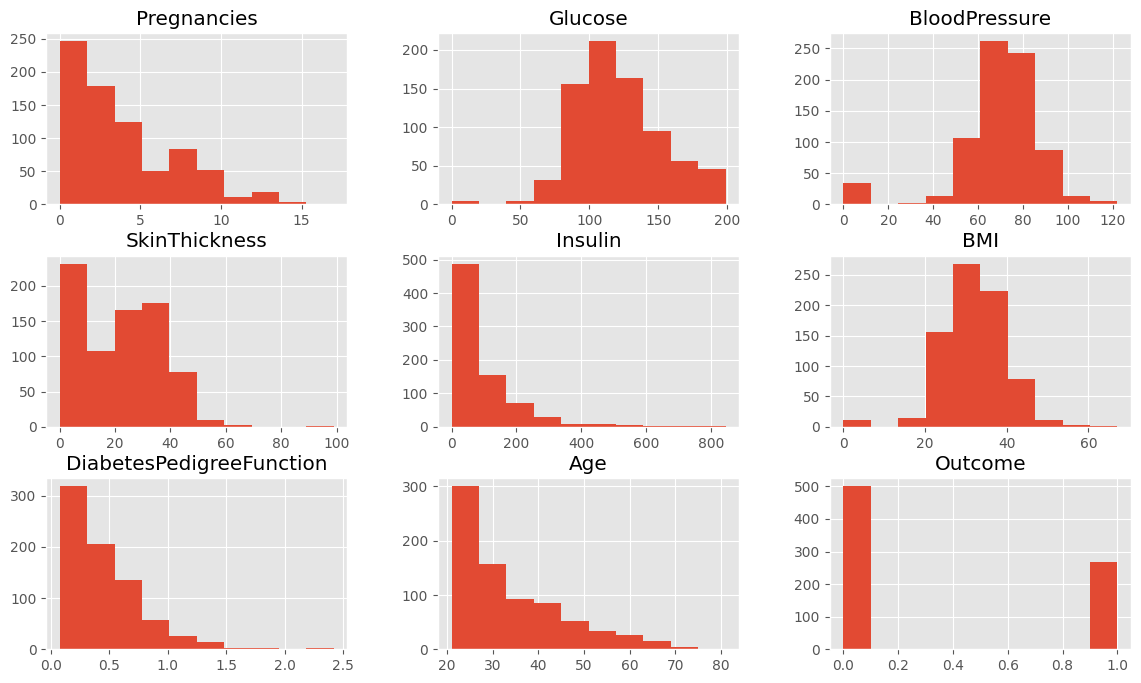

In [85]:
diabetes.boxplot()
diabetes.hist()
plt.show()

Algunas de las características del dataset:

- Tenemos 768 (filas) y 9 columnas (variables).  Todas las columnas son de tipo numérico.

- Se visualizan dos tipos de gráficos para observar la distribución de los registros en las variables.  Se detectan valores dudosos en las variables *'Glucose'*, *'BloodPresure'*, *'BMI'* pues se registran valores 0.  Se infiere que son errores en la transcripción de los registros pues esos valores implican un estado de salud crítico (Glucosa 0 o Presión Sanguínea 0 y en el caso de BMI implicaria un valor de masa 0 o una estatura extramadamente grande)

- En el caso de la insulina, existen muchos valores outliers, los que se pueden observar de mejor manera en el boxplot.


In [86]:
from sklearn.model_selection import train_test_split

X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


**4. Implemente un modelo de redes neuronales.**

**5. Calcule la exactitud del modelo.**

In [87]:
from keras.models import Sequential
from keras.layers import Dense, Input

modelo_red_neuronal = Sequential()

modelo_red_neuronal.add(Input(shape=(X_train.shape[1],)))
modelo_red_neuronal.add(Dense(16, activation='relu'))
modelo_red_neuronal.add(Dense(8, activation='relu'))

modelo_red_neuronal.add(Dense(1, activation='sigmoid'))

modelo_red_neuronal.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

entrenamiento_y_performance_modelo = modelo_red_neuronal.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)


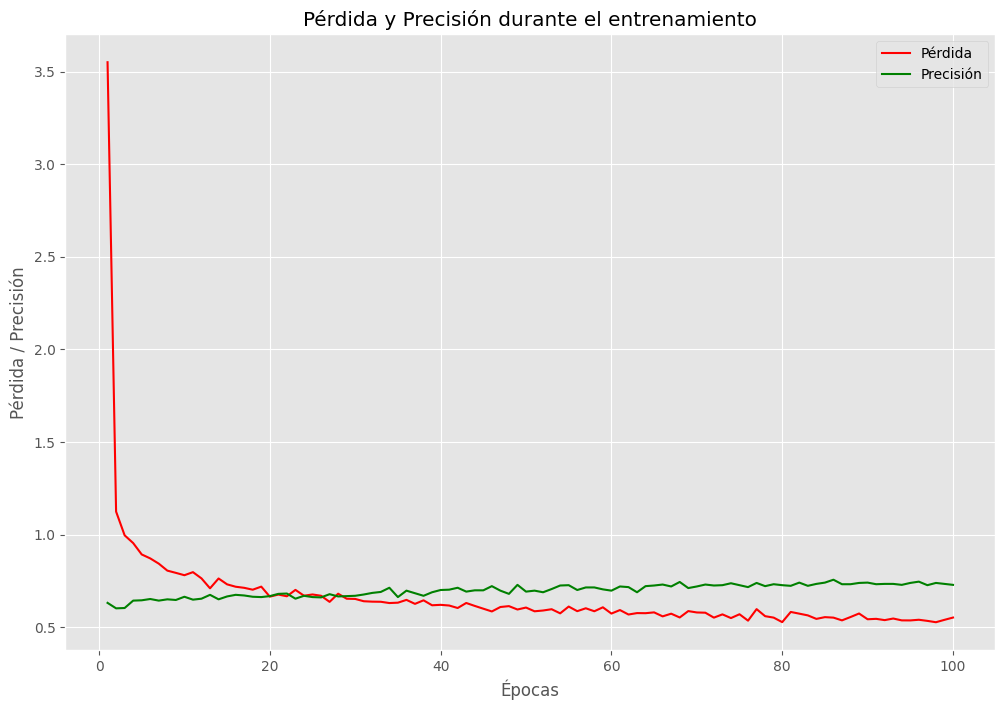

In [88]:
loss = entrenamiento_y_performance_modelo.history['loss']
accuracy = entrenamiento_y_performance_modelo.history['accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, 'r-', label='Pérdida')
plt.plot(epochs, accuracy, 'g-', label='Precisión')
plt.title('Pérdida y Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida / Precisión')
plt.legend()

plt.show()

In [89]:
loss_para_calculos = np.array([loss])
accuracy_para_calculos = np.array([accuracy])

mejores_5_perdida = np.sort(loss_para_calculos[0])[:5]
peores_5_perdida = np.sort(loss_para_calculos[0])[95:]

mejores_5_accuracy = np.sort(accuracy_para_calculos[0])[95:]
peores_5_accuracy = np.sort(accuracy_para_calculos[0])[:5]

print(' MÉTRICAS DEL MODELO '.center(100, '='))
print('\n' + 'Media de Pérdida '.ljust(40, '.') + f' {loss_para_calculos.mean():.2f}'.rjust(60, '.'))
print('Mediana Pérdida '.ljust(40, '.') + f' {np.median(loss_para_calculos):.2f}'.rjust(60, '.'))
print('Mejores 5 valores de Pérdida '.ljust(40, '.') + f' {mejores_5_perdida}'.rjust(60, '.'))
print('Peores 5 valores de Pérdida '.ljust(40, '.') + f' {peores_5_perdida}'.rjust(60, '.') + '\n')

print('Media de Accuracy '.ljust(40, '.') + f' {accuracy_para_calculos.mean():.2f}'.rjust(60, '.'))
print('Mediana Accuracy '.ljust(40, '.') + f' {np.median(accuracy_para_calculos):.2f}'.rjust(60, '.'))
print('Mejores 5 valores de Accuracy '.ljust(40, '.') + f' {mejores_5_accuracy}'.rjust(60, '.'))
print('Peores 5 valores de Accuracy '.ljust(40, '.') + f' {peores_5_accuracy}'.rjust(60, '.') + '\n')

print('=' * 100)

======================================= MÉTRICAS DEL MODELO ========================================

Media de Pérdida .............................................................................. 0.66
Mediana Pérdida ............................................................................... 0.60
Mejores 5 valores de Pérdida .............. [0.52746969 0.52799052 0.53473675 0.53591293 0.53718972]
Peores 5 valores de Pérdida ............... [0.89338613 0.95474964 0.99667954 1.12473607 3.55073571]

Media de Accuracy ............................................................................. 0.70
Mediana Accuracy .............................................................................. 0.70
Mejores 5 valores de Accuracy ............. [0.74131942 0.74131942 0.74479169 0.74652779 0.75694442]
Peores 5 valores de Accuracy .............. [0.60243058 0.60416669 0.63194442 0.64409721 0.64409721]

